# Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm  

from sklearn.mixture import GaussianMixture   

from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans 


# Cleaning the dataset

In [2]:
df = pd.read_csv('1.csv', sep = "	" )

In [3]:
# Dropping the ID number columns
df = df.drop('ID', axis = 1) 

# Dropping the date column
df = df.drop('Dt_Customer', axis = 1)   

# Singe value columns 
df = df.drop('Z_CostContact', axis = 1)   
df = df.drop('Z_Revenue', axis = 1)  


# FIllling the 24 nan values with the mean()
df['Income'] =  df['Income'].fillna(df['Income'].mean())  

# Dummy vars for categorical data.
df = pd.get_dummies(data=df, columns=[ 'Education', 'Marital_Status'])  

df = df.drop('Marital_Status_YOLO', axis = 1)   
df = df.drop('Marital_Status_Absurd', axis = 1)    
df = df.drop('Marital_Status_Alone', axis = 1)




# Assigning and scaling the data

In [4]:
X = df.values

In [5]:
sc = StandardScaler() 
X = sc.fit_transform(X)

# K-Means number of clusters selection. WCSS and Silhouette.

### WCCS: 
#### As we can observe that the 'abrupt' or the squared data stops varying so fast/much from the 2nd cluster. ( The abrupt graph line )  
#### Therefore, 2,3 clusters would be good.

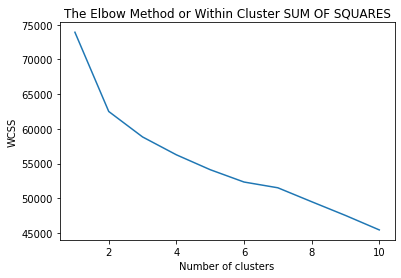

In [6]:
# Within Cluset Squared Sums = a method of choosing the correct number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method or Within Cluster SUM OF SQUARES')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Silhouette method:

In [7]:
def draw_silhouette_plot(X, n_clusters):
    clusterer = KMeans(n_clusters = n_clusters, random_state = 42)

        
    
    cluster_labels = clusterer.fit_predict(X) 
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    
    # Compute the silhouette scores for each sample 
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    # The Silhouette Score ranges from -1  to 1 
    plt.xlim([-1,1])
    
    # The (n_clusters + 1) * 10 is for inserting blank space between silhouette 
    # plots of individual clusters, to demarcate hem clearly 
    
    plt.ylim([0, len(X) + (n_clusters + 1) * 10])
    plt.yticks([]) 
    # Clea the yaxis labels 
    plt.xticks([-1,-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]) 
    
    y_lower = 10 
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[ cluster_labels == i ]
        
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0] 
        y_upper = y_lower  + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 
                         0, ith_cluster_silhouette_values,
                          facecolor = color, edgecolor =color, 
                          alpha = 0.7
                         ) 
        # Compute the new y_lower for next plot 
        y_lower = y_upper + 10 
    
    # The vertical line for the average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color = 'red', linestyle="-")
    plt.title(f'The Silhouette Plot for n_clusters = {n_clusters}')
    plt.legend( 
        ['Silhouette Score'] + [f'Cluster {i}' for i in range(n_clusters)] 
        
    )

### Below we can observe negative scores meaning that there will be some 'noise' in the 2nd cluster and so on

## Since there are not much dissimilarity  between certain data in the vector space, a dominant (cluster 0 ) is formed. 

## Again, as the results/score suggest, we would go for 2 clusters.

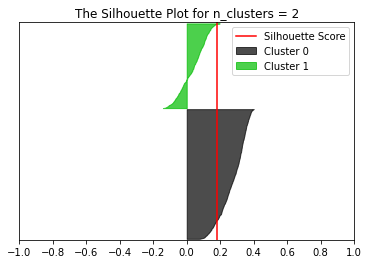

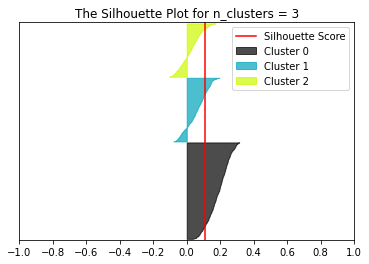

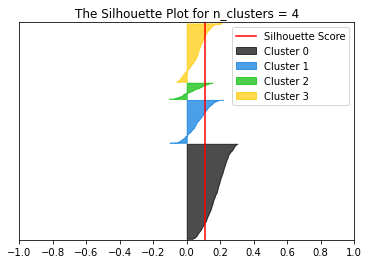

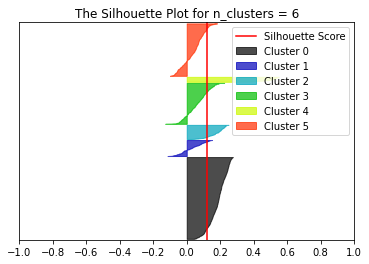

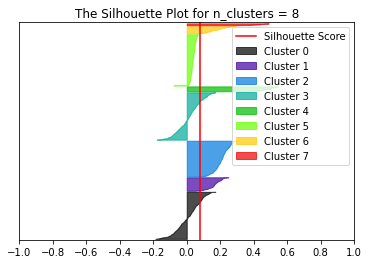

In [8]:

from pylab import figure 
for i, k in enumerate ( [  2 , 3, 4, 6,8] ) :
    figure(i)
    draw_silhouette_plot(X, k)

# Gaussian Mixture Silouhuette method 
## Basically, not major changes.

For n_clusters = 2 The average silhouette_score is : 0.1820211302143557


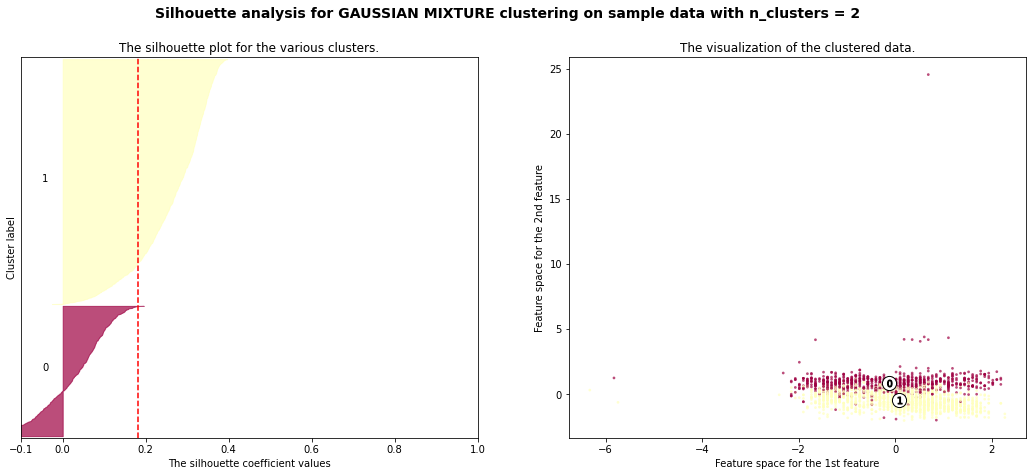

For n_clusters = 3 The average silhouette_score is : 0.06296388397440207


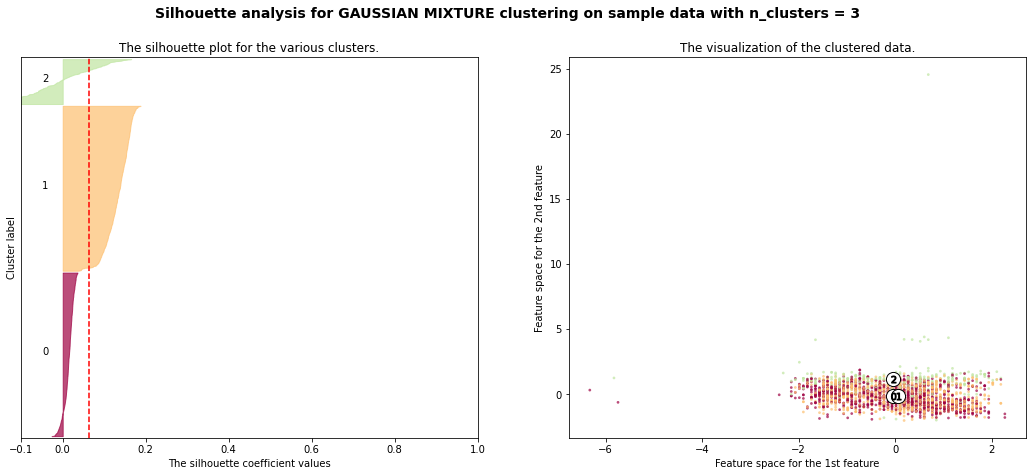

For n_clusters = 4 The average silhouette_score is : 0.13867067598978342


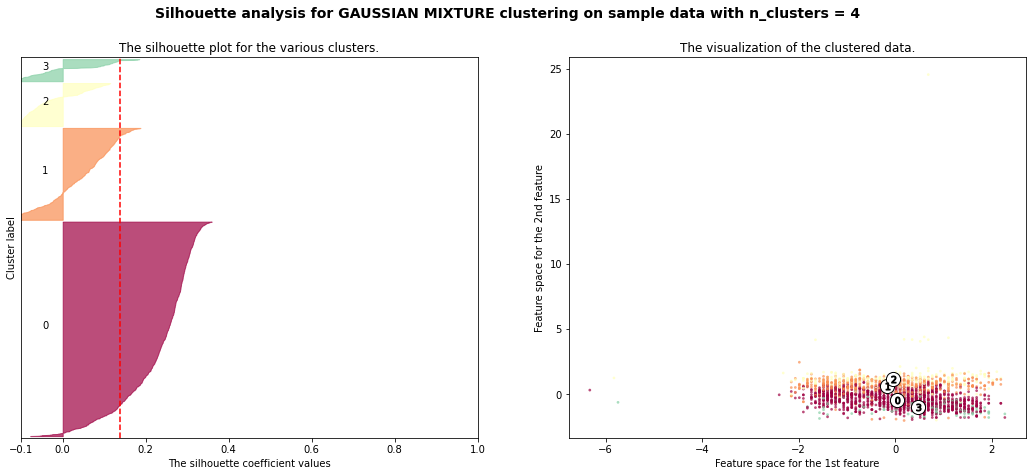

For n_clusters = 6 The average silhouette_score is : 0.046638388953109206


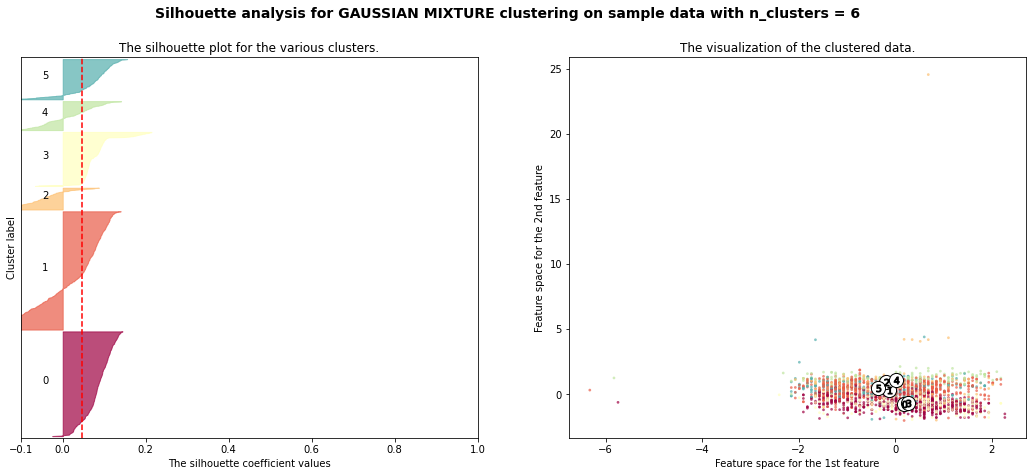

In [9]:
range_n_clusters = [2, 3, 4, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, covariance_type='full')
    clusterer.fit(X)
    cluster_labels=clusterer.predict(X)
    cluster_labels.shape
    #clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i 
        
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)
        #color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed 
    
           
    cmap = cm.get_cmap("Spectral")
    colors = cmap(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.means_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for GAUSSIAN MIXTURE clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

# Creating the clusters and analyzing the data.

In [10]:
# KMeans fitting
kmeans = KMeans(n_clusters = 2, random_state = 69).fit(X) 

# The centers of the clusters (mean values)
centers = sc.inverse_transform ( kmeans.cluster_centers_ )  

# Creating the data frame
df2 = pd.DataFrame(  
    data = centers, 
    index = [f'K{i}' for i in range(1,centers.shape[0] + 1)],
    columns = df.columns
) 

In [11]:
# Gaussian Mixturing fitting
gm = GaussianMixture(n_components=2, random_state=42).fit(X)  

# getting the means values
_means = sc.inverse_transform(gm.means_)  

#Creating the dataframe.
df3 = pd.DataFrame(  
    data = _means, 
    index = [f'K{i}' for i in range(1,centers.shape[0] + 1)],
    columns = df.columns
)

# K-Means

In [12]:
df2

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
K1,1969.926308,39288.313207,0.690494,0.560059,48.798821,106.927045,6.713338,38.025792,9.812822,6.855564,...,0.095800,0.039057,0.482682,0.176124,0.206338,0.097273,0.397937,0.213707,0.260133,0.027266
K2,1967.083805,72162.629684,0.065685,0.423556,49.586636,606.699887,56.406569,365.081540,80.114383,58.117780,...,0.082673,0.001133,0.534541,0.148358,0.233296,0.113250,0.366931,0.215176,0.257078,0.045300


# GM

In [13]:
df3

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
K1,1969.624970,40694.454575,0.636384,0.579878,49.355092,135.823053,9.198363,48.333941,12.187192,8.559335,...,0.090324,3.695084e-02,0.485096,0.177230,0.210400,0.099214,0.392769,0.212284,0.261935,0.030376
K2,1967.268259,73931.430023,0.083467,0.368052,48.648173,619.477054,58.405571,389.588022,85.084428,61.793551,...,0.091190,-4.163336e-17,0.536965,0.142559,0.229286,0.111750,0.372473,0.218042,0.253286,0.041881


In [18]:
df3.iloc[:,15:]

,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
K1,6.22898,0.067730,0.034218,-1.110223e-16,0.000000,0.000000,0.013685,0.093326,0.090324,3.695084e-02,0.485096,0.177230,0.210400,0.099214,0.392769,0.212284,0.261935,0.030376
K2,3.60386,0.082224,0.150261,2.093505e-01,0.184948,0.038531,0.001284,0.253807,0.091190,-4.163336e-17,0.536965,0.142559,0.229286,0.111750,0.372473,0.218042,0.253286,0.041881


# Conclusions. 
##  So almost similar results but really intersting small differences: 

##  As we can observe,  People  (K2) at almost the same age with (K1) , with no kids at home (0.08) have more income.  The higher income would suggests that they are  consuming more wine, fruits, products etc.  Also,  they were more interested in Marketing Campaing ( AcceptedCmp1/2/3/4/5 ) . They have a higher response and approx 10x less complains. 